In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns

In [9]:
df_init=pd.read_csv('initial.csv')
df_init.drop(columns=['Unnamed: 0'],inplace=True)
df_init['DATE']=pd.to_datetime(df_init['DATE'])
df_init.head()

,CAMIS,DATE,SCORE,INSPECTION TYPE,02A,02B,02C,02D,02E,02F,...,10D,10E,10F,10G,10H,10I,10J,ACTION,CRITICAL FLAG,GRADE
0,30075445,2017-05-18,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A
1,30075445,2018-05-11,5.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,0,A
2,30075445,2019-05-16,14.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,B
3,30112340,2016-10-03,48.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,3,C
4,30112340,2017-06-26,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A


In [10]:
ins_count=[]
CAMIS=df_init['CAMIS'].unique()
for cam in CAMIS:
    ins_count.append(len(df_init.loc[df_init['CAMIS']==cam]))

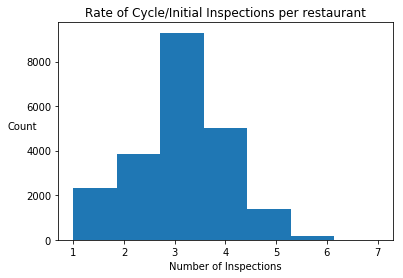

In [11]:
plt.hist(ins_count,bins=7)
plt.title('Rate of Cycle/Initial Inspections per restaurant')
plt.ylabel('Count', rotation=0)
plt.xlabel('Number of Inspections')
plt.show()

In [12]:
pd.Series(ins_count).value_counts()

3    9292
4    5008
2    3856
1    2317
5    1396
6     168
7       1
dtype: int64

In order to investigate correlation between an inspection score and the previous inspection perofrmed at the same restaurant we may only consider resstaurants that have had more than 1 inspection.

In [13]:
df_init_sum=pd.DataFrame()
df_init_sum['CAMIS']=CAMIS
df_init_sum['ins_count']=ins_count
twice_ins=df_init_sum.loc[df_init_sum['ins_count']>=2]['CAMIS'].values
df_twice_init=df_init.loc[df_init['CAMIS'].isin(twice_ins)]

In [14]:
prev=[]
for cam,date in zip(df_twice_init['CAMIS'],df_twice_init['DATE']):
    if len(df_init.loc[(df_init['CAMIS']==cam)&(df_init['DATE']<date)]['SCORE'])>0:
        prev.append(df_init.loc[(df_init['CAMIS']==cam)&(df_init['DATE']<date)]['SCORE'].iloc[-1])
    else:
        prev.append(np.nan)
df_twice_init['prev_score']=prev   

C:\Users\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [15]:
df_twice_init[['SCORE','prev_score']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63615 entries, 0 to 65801
Data columns (total 2 columns):
SCORE         63615 non-null float64
prev_score    43894 non-null float64
dtypes: float64(2)
memory usage: 1.5 MB


In [16]:
df_twice_init.head()

,CAMIS,DATE,SCORE,INSPECTION TYPE,02A,02B,02C,02D,02E,02F,...,10E,10F,10G,10H,10I,10J,ACTION,CRITICAL FLAG,GRADE,prev_score
0,30075445,2017-05-18,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,NaN
1,30075445,2018-05-11,5.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,0,A,7.0
2,30075445,2019-05-16,14.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,B,5.0
3,30112340,2016-10-03,48.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,3,C,NaN
4,30112340,2017-06-26,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,48.0


In [17]:
df_twice_init.dropna(inplace=True)
# nan values are the first inspection for that restaurant in the dataset, there is no previous inspection to compare against

C:\Users\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


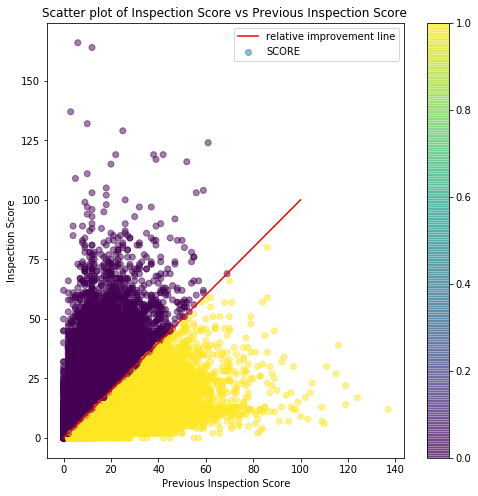

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(df_twice_init['prev_score'],df_twice_init['SCORE'],alpha=0.5,c=df_twice_init['prev_score']-df_twice_init['SCORE']>0)
plt.title('Scatter plot of Inspection Score vs Previous Inspection Score ')
plt.plot([0,20,100],[0,20,100],color='red',label='relative improvement line')
plt.xlabel('Previous Inspection Score')
plt.ylabel('Inspection Score')
plt.colorbar()
plt.legend()
plt.show()

In [19]:
df_twice_init[['SCORE','prev_score']].corr()

,SCORE,prev_score
SCORE,1.000000,0.232972
prev_score,0.232972,1.000000


Surprisingly the score received by a restaurant upon inspection is only weakly correlated to its previous inspection. Restaurants are absolutely capable of adapting their practices and improving (or disimproving)

In [20]:
print('better',round(sum(df_twice_init['prev_score']-df_twice_init['SCORE']>0)/len(df_twice_init),2))
print('same',round(sum(df_twice_init['prev_score']-df_twice_init['SCORE']==0)/len(df_twice_init),2))
print('worse',round(sum(df_twice_init['prev_score']-df_twice_init['SCORE']<0)/len(df_twice_init),2))

      

better 0.48
same 0.06
worse 0.46


In [21]:
prev_crit=[]
for cam,date in zip(df_twice_init['CAMIS'],df_twice_init['DATE']):
    prev_crit.append(df_init.loc[(df_init['CAMIS']==cam)&(df_init['DATE']<date)]['CRITICAL FLAG'].iloc[-1])
df_twice_init['prev_critical']=prev_crit          
df_twice_init.head()

C:\Users\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,CAMIS,DATE,SCORE,INSPECTION TYPE,02A,02B,02C,02D,02E,02F,...,10F,10G,10H,10I,10J,ACTION,CRITICAL FLAG,GRADE,prev_score,prev_critical
1,30075445,2018-05-11,5.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,0,A,7.0,1
2,30075445,2019-05-16,14.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,B,5.0,0
4,30112340,2017-06-26,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,48.0,3
5,30112340,2018-03-13,12.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,7.0,1
6,30112340,2019-03-04,13.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,12.0,1


In [22]:
df_twice_init[['CRITICAL FLAG','prev_critical']].corr()

,CRITICAL FLAG,prev_critical
CRITICAL FLAG,1.000000,0.266088
prev_critical,0.266088,1.000000


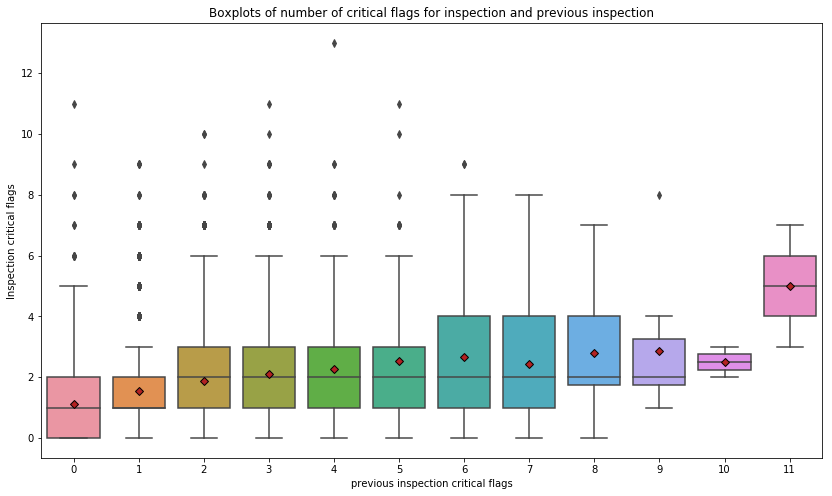

In [23]:
plt.figure(figsize=(14,8))
sns.boxplot(df_twice_init['prev_critical'],df_twice_init['CRITICAL FLAG'],showmeans=True,meanprops=dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick'))
plt.title('Boxplots of number of critical flags for inspection and previous inspection')
plt.ylabel('Inspection critical flags')
plt.xlabel('previous inspection critical flags')
plt.show()

In [24]:
print('better',round(sum(df_twice_init['prev_critical']-df_twice_init['CRITICAL FLAG']>0)/len(df_twice_init),2))
print('same',round(sum(df_twice_init['prev_critical']-df_twice_init['CRITICAL FLAG']==0)/len(df_twice_init),2))
print('worse',round(sum(df_twice_init['prev_critical']-df_twice_init['CRITICAL FLAG']<0)/len(df_twice_init),2))

better 0.36
same 0.31
worse 0.33


In [25]:
df_twice_init['prev_critical'].value_counts(normalize=True).sort_index()

0     0.098351
1     0.389119
2     0.267485
3     0.149633
4     0.062674
5     0.021780
6     0.007473
7     0.002392
8     0.000820
9     0.000182
10    0.000046
11    0.000046
Name: prev_critical, dtype: float64

In [26]:
df_twice_init['CRITICAL FLAG'].value_counts(normalize=True).sort_index()

0     0.110562
1     0.407345
2     0.247437
3     0.140520
4     0.060350
5     0.022463
6     0.007313
7     0.002757
8     0.000729
9     0.000342
10    0.000091
11    0.000068
13    0.000023
Name: CRITICAL FLAG, dtype: float64

C:\Users\kosta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


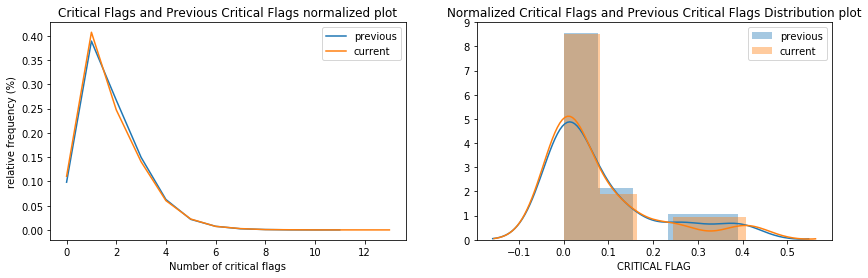

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(df_twice_init['prev_critical'].value_counts(normalize=True).sort_index(),label='previous')
plt.plot(df_twice_init['CRITICAL FLAG'].value_counts(normalize=True).sort_index(),label='current')
plt.title('Critical Flags and Previous Critical Flags normalized plot')
plt.legend()
plt.xlabel('Number of critical flags')
plt.ylabel('relative frequency (%)')

plt.subplot(1,2,2)
sns.distplot(df_twice_init['prev_critical'].value_counts(normalize=True),label='previous')
sns.distplot(df_twice_init['CRITICAL FLAG'].value_counts(normalize=True),label='current')
plt.title('Normalized Critical Flags and Previous Critical Flags Distribution plot')
plt.legend()
# plt.xlabel('Number of critical flags')
# plt.ylabel('relative frequency (%)')
plt.show()

In [28]:
df_twice_init['A']=df_twice_init['GRADE']=='A'
df_twice_init['prev_A']=df_twice_init['prev_score']<=13

C:\Users\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
df_twice_init[['A','prev_A']].corr()

,A,prev_A
A,1.000000,0.234849
prev_A,0.234849,1.000000


In [30]:
df_twice_init.groupby('prev_A')['A'].value_counts()

prev_A  A    
False   False    10060
        True      8675
True    True     17510
        False     7649
Name: A, dtype: int64

<img src='improvement.png'>

40% of two inspection cycles are consistently A on both inspections <br>
17% of two inspection cycles see a restaurant imrove from Not A to an A<br>
20% of two inspection cycles see a restaurant disimprove from an A to Not A<br>
23% of two inspection cycles are conssitentley Not A on both inspections<br>



In [32]:
df_twice_init.to_csv('twice_init.csv')